### 1. Tensor
### 2. Autograd & Variable
### 3. torch.nn & torch.nn.functional

- Pytorch에서 연산을 위한 변수는 모두 Tensor로 선언되어 있어야 한다.
- Autograd 기능을 이용하면 Backprop을 자동으로 수행시킬 수 있음
- 그를 위해서는 Tensor 형태의 변수를 Variable로 감싸야 한다.
- nn과 nn.functional의 차이를 알고 쓰는 것이 좋다.

## Today
##### 1. Data Loader
##### 2. Define the Neural Network.
##### 3. Forward Propagation

## 1. Data Loader

- 입력은 어떻게 정의해야 할까요?
- batch나 epoch나 이런건 어떻게?
- 선처리 어떻게?
- MNIST나 CIFAR10 말고 나의 데이터를 넣을땐 어떻게?

### torchvision
- pip install torchvision

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

import numpy as np

import torchvision
import torchvision.transforms as transforms

In [5]:
# transforms => 전처리를 하기 위한 함수
# Compose는 한칸에 모아주는 역할.
# 여러개의 전처리를 하기 위해선 Compose 함수를 사용
# ToTensor() => 가지고 온 이미지를 Tensor 형태로 바꿈


transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [6]:
trainset = torchvision.datasets.CIFAR10(root="./data",
                                       train=True,
                                       download=True,
                                       transform=transform)

testset = torchvision.datasets.CIFAR10(root="./data",
                                      train=False,
                                      download=True,
                                      transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [14]:

trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=8, shuffle=False, num_workers=2)


In [15]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [22]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    np_img = img.numpy()
    #plt.imshow(np_img)

    # ToTensor() 에서 이미지가 H X W X C 에서, C * H * W로 바뀌는데, 이걸 다시 H * W * C로 바꾸는 작업
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    
    print(np_img.shape)
    print((np.transpose(np_img, (1, 2, 0))).shape)

In [17]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [18]:
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)

0 torch.Size([8, 3, 32, 32]) torch.Size([8])
1 torch.Size([8, 3, 32, 32]) torch.Size([8])
2 torch.Size([8, 3, 32, 32]) torch.Size([8])
3 torch.Size([8, 3, 32, 32]) torch.Size([8])
4 torch.Size([8, 3, 32, 32]) torch.Size([8])
5 torch.Size([8, 3, 32, 32]) torch.Size([8])
6 torch.Size([8, 3, 32, 32]) torch.Size([8])
7 torch.Size([8, 3, 32, 32]) torch.Size([8])
8 torch.Size([8, 3, 32, 32]) torch.Size([8])
9 torch.Size([8, 3, 32, 32]) torch.Size([8])
10 torch.Size([8, 3, 32, 32]) torch.Size([8])
11 torch.Size([8, 3, 32, 32]) torch.Size([8])
12 torch.Size([8, 3, 32, 32]) torch.Size([8])
13 torch.Size([8, 3, 32, 32]) torch.Size([8])
14 torch.Size([8, 3, 32, 32]) torch.Size([8])
15 torch.Size([8, 3, 32, 32]) torch.Size([8])
16 torch.Size([8, 3, 32, 32]) torch.Size([8])
17 torch.Size([8, 3, 32, 32]) torch.Size([8])
18 torch.Size([8, 3, 32, 32]) torch.Size([8])
19 torch.Size([8, 3, 32, 32]) torch.Size([8])
20 torch.Size([8, 3, 32, 32]) torch.Size([8])
21 torch.Size([8, 3, 32, 32]) torch.Size([8]

234 torch.Size([8, 3, 32, 32]) torch.Size([8])
235 torch.Size([8, 3, 32, 32]) torch.Size([8])
236 torch.Size([8, 3, 32, 32]) torch.Size([8])
237 torch.Size([8, 3, 32, 32]) torch.Size([8])
238 torch.Size([8, 3, 32, 32]) torch.Size([8])
239 torch.Size([8, 3, 32, 32]) torch.Size([8])
240 torch.Size([8, 3, 32, 32]) torch.Size([8])
241 torch.Size([8, 3, 32, 32]) torch.Size([8])
242 torch.Size([8, 3, 32, 32]) torch.Size([8])
243 torch.Size([8, 3, 32, 32]) torch.Size([8])
244 torch.Size([8, 3, 32, 32]) torch.Size([8])
245 torch.Size([8, 3, 32, 32]) torch.Size([8])
246 torch.Size([8, 3, 32, 32]) torch.Size([8])
247 torch.Size([8, 3, 32, 32]) torch.Size([8])
248 torch.Size([8, 3, 32, 32]) torch.Size([8])
249 torch.Size([8, 3, 32, 32]) torch.Size([8])
250 torch.Size([8, 3, 32, 32]) torch.Size([8])
251 torch.Size([8, 3, 32, 32]) torch.Size([8])
252 torch.Size([8, 3, 32, 32]) torch.Size([8])
253 torch.Size([8, 3, 32, 32]) torch.Size([8])
254 torch.Size([8, 3, 32, 32]) torch.Size([8])
255 torch.Siz

528 torch.Size([8, 3, 32, 32]) torch.Size([8])
529 torch.Size([8, 3, 32, 32]) torch.Size([8])
530 torch.Size([8, 3, 32, 32]) torch.Size([8])
531 torch.Size([8, 3, 32, 32]) torch.Size([8])
532 torch.Size([8, 3, 32, 32]) torch.Size([8])
533 torch.Size([8, 3, 32, 32]) torch.Size([8])
534 torch.Size([8, 3, 32, 32]) torch.Size([8])
535 torch.Size([8, 3, 32, 32]) torch.Size([8])
536 torch.Size([8, 3, 32, 32]) torch.Size([8])
537 torch.Size([8, 3, 32, 32]) torch.Size([8])
538 torch.Size([8, 3, 32, 32]) torch.Size([8])
539 torch.Size([8, 3, 32, 32]) torch.Size([8])
540 torch.Size([8, 3, 32, 32]) torch.Size([8])
541 torch.Size([8, 3, 32, 32]) torch.Size([8])
542 torch.Size([8, 3, 32, 32]) torch.Size([8])
543 torch.Size([8, 3, 32, 32]) torch.Size([8])
544 torch.Size([8, 3, 32, 32]) torch.Size([8])
545 torch.Size([8, 3, 32, 32]) torch.Size([8])
546 torch.Size([8, 3, 32, 32]) torch.Size([8])
547 torch.Size([8, 3, 32, 32]) torch.Size([8])
548 torch.Size([8, 3, 32, 32]) torch.Size([8])
549 torch.Siz

832 torch.Size([8, 3, 32, 32]) torch.Size([8])
833 torch.Size([8, 3, 32, 32]) torch.Size([8])
834 torch.Size([8, 3, 32, 32]) torch.Size([8])
835 torch.Size([8, 3, 32, 32]) torch.Size([8])
836 torch.Size([8, 3, 32, 32]) torch.Size([8])
837 torch.Size([8, 3, 32, 32]) torch.Size([8])
838 torch.Size([8, 3, 32, 32]) torch.Size([8])
839 torch.Size([8, 3, 32, 32]) torch.Size([8])
840 torch.Size([8, 3, 32, 32]) torch.Size([8])
841 torch.Size([8, 3, 32, 32]) torch.Size([8])
842 torch.Size([8, 3, 32, 32]) torch.Size([8])
843 torch.Size([8, 3, 32, 32]) torch.Size([8])
844 torch.Size([8, 3, 32, 32]) torch.Size([8])
845 torch.Size([8, 3, 32, 32]) torch.Size([8])
846 torch.Size([8, 3, 32, 32]) torch.Size([8])
847 torch.Size([8, 3, 32, 32]) torch.Size([8])
848 torch.Size([8, 3, 32, 32]) torch.Size([8])
849 torch.Size([8, 3, 32, 32]) torch.Size([8])
850 torch.Size([8, 3, 32, 32]) torch.Size([8])
851 torch.Size([8, 3, 32, 32]) torch.Size([8])
852 torch.Size([8, 3, 32, 32]) torch.Size([8])
853 torch.Siz

1131 torch.Size([8, 3, 32, 32]) torch.Size([8])
1132 torch.Size([8, 3, 32, 32]) torch.Size([8])
1133 torch.Size([8, 3, 32, 32]) torch.Size([8])
1134 torch.Size([8, 3, 32, 32]) torch.Size([8])
1135 torch.Size([8, 3, 32, 32]) torch.Size([8])
1136 torch.Size([8, 3, 32, 32]) torch.Size([8])
1137 torch.Size([8, 3, 32, 32]) torch.Size([8])
1138 torch.Size([8, 3, 32, 32]) torch.Size([8])
1139 torch.Size([8, 3, 32, 32]) torch.Size([8])
1140 torch.Size([8, 3, 32, 32]) torch.Size([8])
1141 torch.Size([8, 3, 32, 32]) torch.Size([8])
1142 torch.Size([8, 3, 32, 32]) torch.Size([8])
1143 torch.Size([8, 3, 32, 32]) torch.Size([8])
1144 torch.Size([8, 3, 32, 32]) torch.Size([8])
1145 torch.Size([8, 3, 32, 32]) torch.Size([8])
1146 torch.Size([8, 3, 32, 32]) torch.Size([8])
1147 torch.Size([8, 3, 32, 32]) torch.Size([8])
1148 torch.Size([8, 3, 32, 32]) torch.Size([8])
1149 torch.Size([8, 3, 32, 32]) torch.Size([8])
1150 torch.Size([8, 3, 32, 32]) torch.Size([8])
1151 torch.Size([8, 3, 32, 32]) torch.Si

1434 torch.Size([8, 3, 32, 32]) torch.Size([8])
1435 torch.Size([8, 3, 32, 32]) torch.Size([8])
1436 torch.Size([8, 3, 32, 32]) torch.Size([8])
1437 torch.Size([8, 3, 32, 32]) torch.Size([8])
1438 torch.Size([8, 3, 32, 32]) torch.Size([8])
1439 torch.Size([8, 3, 32, 32]) torch.Size([8])
1440 torch.Size([8, 3, 32, 32]) torch.Size([8])
1441 torch.Size([8, 3, 32, 32]) torch.Size([8])
1442 torch.Size([8, 3, 32, 32]) torch.Size([8])
1443 torch.Size([8, 3, 32, 32]) torch.Size([8])
1444 torch.Size([8, 3, 32, 32]) torch.Size([8])
1445 torch.Size([8, 3, 32, 32]) torch.Size([8])
1446 torch.Size([8, 3, 32, 32]) torch.Size([8])
1447 torch.Size([8, 3, 32, 32]) torch.Size([8])
1448 torch.Size([8, 3, 32, 32]) torch.Size([8])
1449 torch.Size([8, 3, 32, 32]) torch.Size([8])
1450 torch.Size([8, 3, 32, 32]) torch.Size([8])
1451 torch.Size([8, 3, 32, 32]) torch.Size([8])
1452 torch.Size([8, 3, 32, 32]) torch.Size([8])
1453 torch.Size([8, 3, 32, 32]) torch.Size([8])
1454 torch.Size([8, 3, 32, 32]) torch.Si

1737 torch.Size([8, 3, 32, 32]) torch.Size([8])
1738 torch.Size([8, 3, 32, 32]) torch.Size([8])
1739 torch.Size([8, 3, 32, 32]) torch.Size([8])
1740 torch.Size([8, 3, 32, 32]) torch.Size([8])
1741 torch.Size([8, 3, 32, 32]) torch.Size([8])
1742 torch.Size([8, 3, 32, 32]) torch.Size([8])
1743 torch.Size([8, 3, 32, 32]) torch.Size([8])
1744 torch.Size([8, 3, 32, 32]) torch.Size([8])
1745 torch.Size([8, 3, 32, 32]) torch.Size([8])
1746 torch.Size([8, 3, 32, 32]) torch.Size([8])
1747 torch.Size([8, 3, 32, 32]) torch.Size([8])
1748 torch.Size([8, 3, 32, 32]) torch.Size([8])
1749 torch.Size([8, 3, 32, 32]) torch.Size([8])
1750 torch.Size([8, 3, 32, 32]) torch.Size([8])
1751 torch.Size([8, 3, 32, 32]) torch.Size([8])
1752 torch.Size([8, 3, 32, 32]) torch.Size([8])
1753 torch.Size([8, 3, 32, 32]) torch.Size([8])
1754 torch.Size([8, 3, 32, 32]) torch.Size([8])
1755 torch.Size([8, 3, 32, 32]) torch.Size([8])
1756 torch.Size([8, 3, 32, 32]) torch.Size([8])
1757 torch.Size([8, 3, 32, 32]) torch.Si

2031 torch.Size([8, 3, 32, 32]) torch.Size([8])
2032 torch.Size([8, 3, 32, 32]) torch.Size([8])
2033 torch.Size([8, 3, 32, 32]) torch.Size([8])
2034 torch.Size([8, 3, 32, 32]) torch.Size([8])
2035 torch.Size([8, 3, 32, 32]) torch.Size([8])
2036 torch.Size([8, 3, 32, 32]) torch.Size([8])
2037 torch.Size([8, 3, 32, 32]) torch.Size([8])
2038 torch.Size([8, 3, 32, 32]) torch.Size([8])
2039 torch.Size([8, 3, 32, 32]) torch.Size([8])
2040 torch.Size([8, 3, 32, 32]) torch.Size([8])
2041 torch.Size([8, 3, 32, 32]) torch.Size([8])
2042 torch.Size([8, 3, 32, 32]) torch.Size([8])
2043 torch.Size([8, 3, 32, 32]) torch.Size([8])
2044 torch.Size([8, 3, 32, 32]) torch.Size([8])
2045 torch.Size([8, 3, 32, 32]) torch.Size([8])
2046 torch.Size([8, 3, 32, 32]) torch.Size([8])
2047 torch.Size([8, 3, 32, 32]) torch.Size([8])
2048 torch.Size([8, 3, 32, 32]) torch.Size([8])
2049 torch.Size([8, 3, 32, 32]) torch.Size([8])
2050 torch.Size([8, 3, 32, 32]) torch.Size([8])
2051 torch.Size([8, 3, 32, 32]) torch.Si

2334 torch.Size([8, 3, 32, 32]) torch.Size([8])
2335 torch.Size([8, 3, 32, 32]) torch.Size([8])
2336 torch.Size([8, 3, 32, 32]) torch.Size([8])
2337 torch.Size([8, 3, 32, 32]) torch.Size([8])
2338 torch.Size([8, 3, 32, 32]) torch.Size([8])
2339 torch.Size([8, 3, 32, 32]) torch.Size([8])
2340 torch.Size([8, 3, 32, 32]) torch.Size([8])
2341 torch.Size([8, 3, 32, 32]) torch.Size([8])
2342 torch.Size([8, 3, 32, 32]) torch.Size([8])
2343 torch.Size([8, 3, 32, 32]) torch.Size([8])
2344 torch.Size([8, 3, 32, 32]) torch.Size([8])
2345 torch.Size([8, 3, 32, 32]) torch.Size([8])
2346 torch.Size([8, 3, 32, 32]) torch.Size([8])
2347 torch.Size([8, 3, 32, 32]) torch.Size([8])
2348 torch.Size([8, 3, 32, 32]) torch.Size([8])
2349 torch.Size([8, 3, 32, 32]) torch.Size([8])
2350 torch.Size([8, 3, 32, 32]) torch.Size([8])
2351 torch.Size([8, 3, 32, 32]) torch.Size([8])
2352 torch.Size([8, 3, 32, 32]) torch.Size([8])
2353 torch.Size([8, 3, 32, 32]) torch.Size([8])
2354 torch.Size([8, 3, 32, 32]) torch.Si

2641 torch.Size([8, 3, 32, 32]) torch.Size([8])
2642 torch.Size([8, 3, 32, 32]) torch.Size([8])
2643 torch.Size([8, 3, 32, 32]) torch.Size([8])
2644 torch.Size([8, 3, 32, 32]) torch.Size([8])
2645 torch.Size([8, 3, 32, 32]) torch.Size([8])
2646 torch.Size([8, 3, 32, 32]) torch.Size([8])
2647 torch.Size([8, 3, 32, 32]) torch.Size([8])
2648 torch.Size([8, 3, 32, 32]) torch.Size([8])
2649 torch.Size([8, 3, 32, 32]) torch.Size([8])
2650 torch.Size([8, 3, 32, 32]) torch.Size([8])
2651 torch.Size([8, 3, 32, 32]) torch.Size([8])
2652 torch.Size([8, 3, 32, 32]) torch.Size([8])
2653 torch.Size([8, 3, 32, 32]) torch.Size([8])
2654 torch.Size([8, 3, 32, 32]) torch.Size([8])
2655 torch.Size([8, 3, 32, 32]) torch.Size([8])
2656 torch.Size([8, 3, 32, 32]) torch.Size([8])
2657 torch.Size([8, 3, 32, 32]) torch.Size([8])
2658 torch.Size([8, 3, 32, 32]) torch.Size([8])
2659 torch.Size([8, 3, 32, 32]) torch.Size([8])
2660 torch.Size([8, 3, 32, 32]) torch.Size([8])
2661 torch.Size([8, 3, 32, 32]) torch.Si

2946 torch.Size([8, 3, 32, 32]) torch.Size([8])
2947 torch.Size([8, 3, 32, 32]) torch.Size([8])
2948 torch.Size([8, 3, 32, 32]) torch.Size([8])
2949 torch.Size([8, 3, 32, 32]) torch.Size([8])
2950 torch.Size([8, 3, 32, 32]) torch.Size([8])
2951 torch.Size([8, 3, 32, 32]) torch.Size([8])
2952 torch.Size([8, 3, 32, 32]) torch.Size([8])
2953 torch.Size([8, 3, 32, 32]) torch.Size([8])
2954 torch.Size([8, 3, 32, 32]) torch.Size([8])
2955 torch.Size([8, 3, 32, 32]) torch.Size([8])
2956 torch.Size([8, 3, 32, 32]) torch.Size([8])
2957 torch.Size([8, 3, 32, 32]) torch.Size([8])
2958 torch.Size([8, 3, 32, 32]) torch.Size([8])
2959 torch.Size([8, 3, 32, 32]) torch.Size([8])
2960 torch.Size([8, 3, 32, 32]) torch.Size([8])
2961 torch.Size([8, 3, 32, 32]) torch.Size([8])
2962 torch.Size([8, 3, 32, 32]) torch.Size([8])
2963 torch.Size([8, 3, 32, 32]) torch.Size([8])
2964 torch.Size([8, 3, 32, 32]) torch.Size([8])
2965 torch.Size([8, 3, 32, 32]) torch.Size([8])
2966 torch.Size([8, 3, 32, 32]) torch.Si

3250 torch.Size([8, 3, 32, 32]) torch.Size([8])
3251 torch.Size([8, 3, 32, 32]) torch.Size([8])
3252 torch.Size([8, 3, 32, 32]) torch.Size([8])
3253 torch.Size([8, 3, 32, 32]) torch.Size([8])
3254 torch.Size([8, 3, 32, 32]) torch.Size([8])
3255 torch.Size([8, 3, 32, 32]) torch.Size([8])
3256 torch.Size([8, 3, 32, 32]) torch.Size([8])
3257 torch.Size([8, 3, 32, 32]) torch.Size([8])
3258 torch.Size([8, 3, 32, 32]) torch.Size([8])
3259 torch.Size([8, 3, 32, 32]) torch.Size([8])
3260 torch.Size([8, 3, 32, 32]) torch.Size([8])
3261 torch.Size([8, 3, 32, 32]) torch.Size([8])
3262 torch.Size([8, 3, 32, 32]) torch.Size([8])
3263 torch.Size([8, 3, 32, 32]) torch.Size([8])
3264 torch.Size([8, 3, 32, 32]) torch.Size([8])
3265 torch.Size([8, 3, 32, 32]) torch.Size([8])
3266 torch.Size([8, 3, 32, 32]) torch.Size([8])
3267 torch.Size([8, 3, 32, 32]) torch.Size([8])
3268 torch.Size([8, 3, 32, 32]) torch.Size([8])
3269 torch.Size([8, 3, 32, 32]) torch.Size([8])
3270 torch.Size([8, 3, 32, 32]) torch.Si

3545 torch.Size([8, 3, 32, 32]) torch.Size([8])
3546 torch.Size([8, 3, 32, 32]) torch.Size([8])
3547 torch.Size([8, 3, 32, 32]) torch.Size([8])
3548 torch.Size([8, 3, 32, 32]) torch.Size([8])
3549 torch.Size([8, 3, 32, 32]) torch.Size([8])
3550 torch.Size([8, 3, 32, 32]) torch.Size([8])
3551 torch.Size([8, 3, 32, 32]) torch.Size([8])
3552 torch.Size([8, 3, 32, 32]) torch.Size([8])
3553 torch.Size([8, 3, 32, 32]) torch.Size([8])
3554 torch.Size([8, 3, 32, 32]) torch.Size([8])
3555 torch.Size([8, 3, 32, 32]) torch.Size([8])
3556 torch.Size([8, 3, 32, 32]) torch.Size([8])
3557 torch.Size([8, 3, 32, 32]) torch.Size([8])
3558 torch.Size([8, 3, 32, 32]) torch.Size([8])
3559 torch.Size([8, 3, 32, 32]) torch.Size([8])
3560 torch.Size([8, 3, 32, 32]) torch.Size([8])
3561 torch.Size([8, 3, 32, 32]) torch.Size([8])
3562 torch.Size([8, 3, 32, 32]) torch.Size([8])
3563 torch.Size([8, 3, 32, 32]) torch.Size([8])
3564 torch.Size([8, 3, 32, 32]) torch.Size([8])
3565 torch.Size([8, 3, 32, 32]) torch.Si

3842 torch.Size([8, 3, 32, 32]) torch.Size([8])
3843 torch.Size([8, 3, 32, 32]) torch.Size([8])
3844 torch.Size([8, 3, 32, 32]) torch.Size([8])
3845 torch.Size([8, 3, 32, 32]) torch.Size([8])
3846 torch.Size([8, 3, 32, 32]) torch.Size([8])
3847 torch.Size([8, 3, 32, 32]) torch.Size([8])
3848 torch.Size([8, 3, 32, 32]) torch.Size([8])
3849 torch.Size([8, 3, 32, 32]) torch.Size([8])
3850 torch.Size([8, 3, 32, 32]) torch.Size([8])
3851 torch.Size([8, 3, 32, 32]) torch.Size([8])
3852 torch.Size([8, 3, 32, 32]) torch.Size([8])
3853 torch.Size([8, 3, 32, 32]) torch.Size([8])
3854 torch.Size([8, 3, 32, 32]) torch.Size([8])
3855 torch.Size([8, 3, 32, 32]) torch.Size([8])
3856 torch.Size([8, 3, 32, 32]) torch.Size([8])
3857 torch.Size([8, 3, 32, 32]) torch.Size([8])
3858 torch.Size([8, 3, 32, 32]) torch.Size([8])
3859 torch.Size([8, 3, 32, 32]) torch.Size([8])
3860 torch.Size([8, 3, 32, 32]) torch.Size([8])
3861 torch.Size([8, 3, 32, 32]) torch.Size([8])
3862 torch.Size([8, 3, 32, 32]) torch.Si

4134 torch.Size([8, 3, 32, 32]) torch.Size([8])
4135 torch.Size([8, 3, 32, 32]) torch.Size([8])
4136 torch.Size([8, 3, 32, 32]) torch.Size([8])
4137 torch.Size([8, 3, 32, 32]) torch.Size([8])
4138 torch.Size([8, 3, 32, 32]) torch.Size([8])
4139 torch.Size([8, 3, 32, 32]) torch.Size([8])
4140 torch.Size([8, 3, 32, 32]) torch.Size([8])
4141 torch.Size([8, 3, 32, 32]) torch.Size([8])
4142 torch.Size([8, 3, 32, 32]) torch.Size([8])
4143 torch.Size([8, 3, 32, 32]) torch.Size([8])
4144 torch.Size([8, 3, 32, 32]) torch.Size([8])
4145 torch.Size([8, 3, 32, 32]) torch.Size([8])
4146 torch.Size([8, 3, 32, 32]) torch.Size([8])
4147 torch.Size([8, 3, 32, 32]) torch.Size([8])
4148 torch.Size([8, 3, 32, 32]) torch.Size([8])
4149 torch.Size([8, 3, 32, 32]) torch.Size([8])
4150 torch.Size([8, 3, 32, 32]) torch.Size([8])
4151 torch.Size([8, 3, 32, 32]) torch.Size([8])
4152 torch.Size([8, 3, 32, 32]) torch.Size([8])
4153 torch.Size([8, 3, 32, 32]) torch.Size([8])
4154 torch.Size([8, 3, 32, 32]) torch.Si

4430 torch.Size([8, 3, 32, 32]) torch.Size([8])
4431 torch.Size([8, 3, 32, 32]) torch.Size([8])
4432 torch.Size([8, 3, 32, 32]) torch.Size([8])
4433 torch.Size([8, 3, 32, 32]) torch.Size([8])
4434 torch.Size([8, 3, 32, 32]) torch.Size([8])
4435 torch.Size([8, 3, 32, 32]) torch.Size([8])
4436 torch.Size([8, 3, 32, 32]) torch.Size([8])
4437 torch.Size([8, 3, 32, 32]) torch.Size([8])
4438 torch.Size([8, 3, 32, 32]) torch.Size([8])
4439 torch.Size([8, 3, 32, 32]) torch.Size([8])
4440 torch.Size([8, 3, 32, 32]) torch.Size([8])
4441 torch.Size([8, 3, 32, 32]) torch.Size([8])
4442 torch.Size([8, 3, 32, 32]) torch.Size([8])
4443 torch.Size([8, 3, 32, 32]) torch.Size([8])
4444 torch.Size([8, 3, 32, 32]) torch.Size([8])
4445 torch.Size([8, 3, 32, 32]) torch.Size([8])
4446 torch.Size([8, 3, 32, 32]) torch.Size([8])
4447 torch.Size([8, 3, 32, 32]) torch.Size([8])
4448 torch.Size([8, 3, 32, 32]) torch.Size([8])
4449 torch.Size([8, 3, 32, 32]) torch.Size([8])
4450 torch.Size([8, 3, 32, 32]) torch.Si

4721 torch.Size([8, 3, 32, 32]) torch.Size([8])
4722 torch.Size([8, 3, 32, 32]) torch.Size([8])
4723 torch.Size([8, 3, 32, 32]) torch.Size([8])
4724 torch.Size([8, 3, 32, 32]) torch.Size([8])
4725 torch.Size([8, 3, 32, 32]) torch.Size([8])
4726 torch.Size([8, 3, 32, 32]) torch.Size([8])
4727 torch.Size([8, 3, 32, 32]) torch.Size([8])
4728 torch.Size([8, 3, 32, 32]) torch.Size([8])
4729 torch.Size([8, 3, 32, 32]) torch.Size([8])
4730 torch.Size([8, 3, 32, 32]) torch.Size([8])
4731 torch.Size([8, 3, 32, 32]) torch.Size([8])
4732 torch.Size([8, 3, 32, 32]) torch.Size([8])
4733 torch.Size([8, 3, 32, 32]) torch.Size([8])
4734 torch.Size([8, 3, 32, 32]) torch.Size([8])
4735 torch.Size([8, 3, 32, 32]) torch.Size([8])
4736 torch.Size([8, 3, 32, 32]) torch.Size([8])
4737 torch.Size([8, 3, 32, 32]) torch.Size([8])
4738 torch.Size([8, 3, 32, 32]) torch.Size([8])
4739 torch.Size([8, 3, 32, 32]) torch.Size([8])
4740 torch.Size([8, 3, 32, 32]) torch.Size([8])
4741 torch.Size([8, 3, 32, 32]) torch.Si

5026 torch.Size([8, 3, 32, 32]) torch.Size([8])
5027 torch.Size([8, 3, 32, 32]) torch.Size([8])
5028 torch.Size([8, 3, 32, 32]) torch.Size([8])
5029 torch.Size([8, 3, 32, 32]) torch.Size([8])
5030 torch.Size([8, 3, 32, 32]) torch.Size([8])
5031 torch.Size([8, 3, 32, 32]) torch.Size([8])
5032 torch.Size([8, 3, 32, 32]) torch.Size([8])
5033 torch.Size([8, 3, 32, 32]) torch.Size([8])
5034 torch.Size([8, 3, 32, 32]) torch.Size([8])
5035 torch.Size([8, 3, 32, 32]) torch.Size([8])
5036 torch.Size([8, 3, 32, 32]) torch.Size([8])
5037 torch.Size([8, 3, 32, 32]) torch.Size([8])
5038 torch.Size([8, 3, 32, 32]) torch.Size([8])
5039 torch.Size([8, 3, 32, 32]) torch.Size([8])
5040 torch.Size([8, 3, 32, 32]) torch.Size([8])
5041 torch.Size([8, 3, 32, 32]) torch.Size([8])
5042 torch.Size([8, 3, 32, 32]) torch.Size([8])
5043 torch.Size([8, 3, 32, 32]) torch.Size([8])
5044 torch.Size([8, 3, 32, 32]) torch.Size([8])
5045 torch.Size([8, 3, 32, 32]) torch.Size([8])
5046 torch.Size([8, 3, 32, 32]) torch.Si

5321 torch.Size([8, 3, 32, 32]) torch.Size([8])
5322 torch.Size([8, 3, 32, 32]) torch.Size([8])
5323 torch.Size([8, 3, 32, 32]) torch.Size([8])
5324 torch.Size([8, 3, 32, 32]) torch.Size([8])
5325 torch.Size([8, 3, 32, 32]) torch.Size([8])
5326 torch.Size([8, 3, 32, 32]) torch.Size([8])
5327 torch.Size([8, 3, 32, 32]) torch.Size([8])
5328 torch.Size([8, 3, 32, 32]) torch.Size([8])
5329 torch.Size([8, 3, 32, 32]) torch.Size([8])
5330 torch.Size([8, 3, 32, 32]) torch.Size([8])
5331 torch.Size([8, 3, 32, 32]) torch.Size([8])
5332 torch.Size([8, 3, 32, 32]) torch.Size([8])
5333 torch.Size([8, 3, 32, 32]) torch.Size([8])
5334 torch.Size([8, 3, 32, 32]) torch.Size([8])
5335 torch.Size([8, 3, 32, 32]) torch.Size([8])
5336 torch.Size([8, 3, 32, 32]) torch.Size([8])
5337 torch.Size([8, 3, 32, 32]) torch.Size([8])
5338 torch.Size([8, 3, 32, 32]) torch.Size([8])
5339 torch.Size([8, 3, 32, 32]) torch.Size([8])
5340 torch.Size([8, 3, 32, 32]) torch.Size([8])
5341 torch.Size([8, 3, 32, 32]) torch.Si

5582 torch.Size([8, 3, 32, 32]) torch.Size([8])
5583 torch.Size([8, 3, 32, 32]) torch.Size([8])
5584 torch.Size([8, 3, 32, 32]) torch.Size([8])
5585 torch.Size([8, 3, 32, 32]) torch.Size([8])
5586 torch.Size([8, 3, 32, 32]) torch.Size([8])
5587 torch.Size([8, 3, 32, 32]) torch.Size([8])
5588 torch.Size([8, 3, 32, 32]) torch.Size([8])
5589 torch.Size([8, 3, 32, 32]) torch.Size([8])
5590 torch.Size([8, 3, 32, 32]) torch.Size([8])
5591 torch.Size([8, 3, 32, 32]) torch.Size([8])
5592 torch.Size([8, 3, 32, 32]) torch.Size([8])
5593 torch.Size([8, 3, 32, 32]) torch.Size([8])
5594 torch.Size([8, 3, 32, 32]) torch.Size([8])
5595 torch.Size([8, 3, 32, 32]) torch.Size([8])
5596 torch.Size([8, 3, 32, 32]) torch.Size([8])
5597 torch.Size([8, 3, 32, 32]) torch.Size([8])
5598 torch.Size([8, 3, 32, 32]) torch.Size([8])
5599 torch.Size([8, 3, 32, 32]) torch.Size([8])
5600 torch.Size([8, 3, 32, 32]) torch.Size([8])
5601 torch.Size([8, 3, 32, 32]) torch.Size([8])
5602 torch.Size([8, 3, 32, 32]) torch.Si

5867 torch.Size([8, 3, 32, 32]) torch.Size([8])
5868 torch.Size([8, 3, 32, 32]) torch.Size([8])
5869 torch.Size([8, 3, 32, 32]) torch.Size([8])
5870 torch.Size([8, 3, 32, 32]) torch.Size([8])
5871 torch.Size([8, 3, 32, 32]) torch.Size([8])
5872 torch.Size([8, 3, 32, 32]) torch.Size([8])
5873 torch.Size([8, 3, 32, 32]) torch.Size([8])
5874 torch.Size([8, 3, 32, 32]) torch.Size([8])
5875 torch.Size([8, 3, 32, 32]) torch.Size([8])
5876 torch.Size([8, 3, 32, 32]) torch.Size([8])
5877 torch.Size([8, 3, 32, 32]) torch.Size([8])
5878 torch.Size([8, 3, 32, 32]) torch.Size([8])
5879 torch.Size([8, 3, 32, 32]) torch.Size([8])
5880 torch.Size([8, 3, 32, 32]) torch.Size([8])
5881 torch.Size([8, 3, 32, 32]) torch.Size([8])
5882 torch.Size([8, 3, 32, 32]) torch.Size([8])
5883 torch.Size([8, 3, 32, 32]) torch.Size([8])
5884 torch.Size([8, 3, 32, 32]) torch.Size([8])
5885 torch.Size([8, 3, 32, 32]) torch.Size([8])
5886 torch.Size([8, 3, 32, 32]) torch.Size([8])
5887 torch.Size([8, 3, 32, 32]) torch.Si

6167 torch.Size([8, 3, 32, 32]) torch.Size([8])
6168 torch.Size([8, 3, 32, 32]) torch.Size([8])
6169 torch.Size([8, 3, 32, 32]) torch.Size([8])
6170 torch.Size([8, 3, 32, 32]) torch.Size([8])
6171 torch.Size([8, 3, 32, 32]) torch.Size([8])
6172 torch.Size([8, 3, 32, 32]) torch.Size([8])
6173 torch.Size([8, 3, 32, 32]) torch.Size([8])
6174 torch.Size([8, 3, 32, 32]) torch.Size([8])
6175 torch.Size([8, 3, 32, 32]) torch.Size([8])
6176 torch.Size([8, 3, 32, 32]) torch.Size([8])
6177 torch.Size([8, 3, 32, 32]) torch.Size([8])
6178 torch.Size([8, 3, 32, 32]) torch.Size([8])
6179 torch.Size([8, 3, 32, 32]) torch.Size([8])
6180 torch.Size([8, 3, 32, 32]) torch.Size([8])
6181 torch.Size([8, 3, 32, 32]) torch.Size([8])
6182 torch.Size([8, 3, 32, 32]) torch.Size([8])
6183 torch.Size([8, 3, 32, 32]) torch.Size([8])
6184 torch.Size([8, 3, 32, 32]) torch.Size([8])
6185 torch.Size([8, 3, 32, 32]) torch.Size([8])
6186 torch.Size([8, 3, 32, 32]) torch.Size([8])
6187 torch.Size([8, 3, 32, 32]) torch.Si

torch.Size([8, 3, 32, 32])
(3, 70, 138)
(70, 138, 3)
torch.Size([8, 3, 32, 32])
  cat plane  deer   car  ship   dog truck   cat 


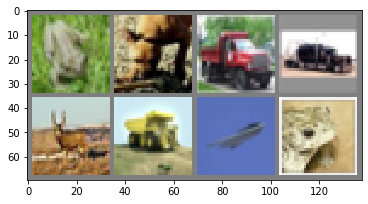

In [25]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print(''.join('%5s ' %classes[labels[j]] for j in range(8)))

In [30]:
trans = transforms.Compose([transforms.Resize((227, 227)),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.ImageFolder(root="./train", transform=trans)

In [33]:
len(trainset)

32010

## 신경망 정의

- Class로 선언할 Network에 핈 ㅜ요소
    - init(self)
    - forward(self, x)

In [1]:
class my_network(nn.Module):
    
    def __init__(self):
        
        # 무조건 써야 함.
        super(my_network, self).__init__()
        
        # 사용할 함수들을 정의
            
    # input이 여러개 일 경우도 있음. x, y, 등등..
    def forward(self, x):
        
        # Network의 forward를 정의하는 장소

SyntaxError: unexpected EOF while parsing (<ipython-input-1-c212f3ed86d2>, line 13)

In [7]:
trainset = torchvision.datasets.CIFAR10(root="./data",
                                       train=True,
                                       download=True,
                                       transform=transform)

testset = torchvision.datasets.CIFAR10(root="./data",
                                      train=False,
                                      download=True,
                                      transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
trainloader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

In [11]:
def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    np_img = img.numpy()
    #plt.imshow(np_img)

    # ToTensor() 에서 이미지가 H X W X C 에서, C * H * W로 바뀌는데, 이걸 다시 H * W * C로 바꾸는 작업
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    
    print(np_img.shape)
    print((np.transpose(np_img, (1, 2, 0))).shape)

In [12]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

torch.Size([8, 3, 32, 32])
(3, 70, 138)
(70, 138, 3)
torch.Size([8, 3, 32, 32])


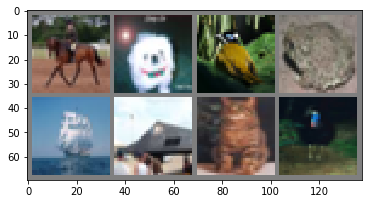

In [13]:
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)

## nn.conv2d
## network에 넣을 input이 무엇인가?

- nn.conv2d => (input_ch, output_ch, kernnel_size)
- batch = 8, ch = 3, height size = 32, 32
- nn.conv2d(3, 5, 5)

In [14]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([8])


In [15]:
# channel, filter의 개수, filter의 크기
net = nn.Conv2d(3, 5, 5)

In [16]:
out1 = net(Variable(imgs))
print(out1.shape)
# batchsize = 8
# channel = 5
# 32 * 32 를 5 * 5 로 conv했으니 28*28이 된다.

torch.Size([8, 5, 28, 28])


In [17]:
net2 = nn.Conv2d(5, 10, 5)

In [18]:
out2 = net2(out1)
print(out2.shape)

torch.Size([8, 10, 24, 24])


In [19]:
class my_network(nn.Module):
    
    def __init__(self):
        
        # 무조건 써야 함.
        super(my_network, self).__init__()
        
        # 사용할 함수들을 정의
        self.net_1 = nn.Conv2d(3, 5, 5)
        self.net_2 = nn.Conv2d(5, 10, 5)
        
    # input이 여러개 일 경우도 있음. x, y, 등등..
    def forward(self, x):
        
        # Network의 forward를 정의하는 장소
        x = self.net_1(x)
        x = self.net_2(x)
        
        return x

In [20]:
imgs = 0
for n, (img, labels) in enumerate(trainloader):
    print(n, img.shape, labels.shape)
    imgs = img
    break

0 torch.Size([8, 3, 32, 32]) torch.Size([8])


In [22]:
my_net = my_network()

In [23]:
out = my_net(Variable(imgs))
print(out.shape)

torch.Size([8, 10, 24, 24])
